In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# 1. Data loading and splitting

In [2]:
data = load_digits()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# 2. Data preprocessing

## 2.1 Scaling and feature selection

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

In [8]:
preprocessor = Pipeline([
    ('scaler', MinMaxScaler()),
    ('selector', SelectKBest(f_classif, k=20))
])

In [9]:
X_train_preprocessed = preprocessor.fit_transform(X_train, y_train)
X_test_preprocessed = preprocessor.transform(X_test)

C:\Users\Muhammad_Haseeb\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Muhammad_Haseeb\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


## 2.2 Dimensionality reduction with PCA

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_preprocessed)

# 3. Data visualization

## 3.1 Feature importance

In [12]:
import matplotlib.pyplot as plt

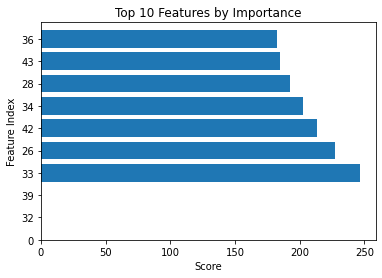

In [15]:
selector = preprocessor.named_steps['selector']
feature_scores = selector.scores_
top_10_indices = feature_scores.argsort()[-10:][::-1]
top_10_scores = feature_scores[top_10_indices]

plt.barh(range(10), top_10_scores)
plt.xlabel('Score')
plt.yticks(range(10), top_10_indices)
plt.ylabel('Feature Index')
plt.title('Top 10 Features by Importance')
plt.show()


## 3.2 PCA visualization

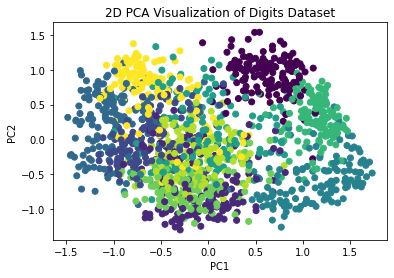

In [16]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Visualization of Digits Dataset')
plt.show()


# 4. Model training and evaluation

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {'max_depth': [1, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10, 15, 20]}

In [19]:
DTC = DecisionTreeClassifier()

In [20]:
grid = GridSearchCV(DTC, param_grid=param_grid, cv=5)
grid.fit(X_train_preprocessed, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20]})

In [21]:
print("Best parameters: ", grid.best_params_)
print("Training accuracy: ", grid.best_score_)
print("Test accuracy: ", grid.score(X_test_preprocessed, y_test))

Best parameters:  {'max_depth': 15, 'min_samples_split': 2}
Training accuracy:  0.8343786295005806
Test accuracy:  0.8555555555555555
